#  This Is TRAINING Set for soccer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
soccer=pd.read_csv(r"F:\r studio\python\ML Project soccer score prediction\training_data.csv",sep=';')

In [3]:
soccer.head()

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
0,153809,407,400,2019-10-06,Brøndby Stadion,515,Superligaen,Denmark,2019,Regular Season - 12,...,1.0,18,18,10,6,6,5,2,7,1
1,363929,7412,7410,2020-02-15,?smet Atl? Stadyumu,1614,3. Lig - Group 2,Turkey,2019,Group 2 - 23,...,2.0,2,2,2,1,0,0,0,1,1
2,317056,2312,2302,2019-08-23,Estadio Olímpico Andrés Quintana Roo (Cancún),587,Ascenso MX,Mexico,2019,Apertura - 4,...,1.0,3,4,3,1,0,1,0,2,0
3,487467,12711,6638,2019-11-09,Sportplatz Rheinau,2246,1. Liga Classic - Group 3,Switzerland,2019,Group 3 - 14,...,1.8,2,1,0,0,1,1,1,0,0
4,368836,563,209,2019-08-29,Yaakov Turner Toto Stadium,514,UEFA Europa League,World,2019,Play-offs,...,1.0,1,1,1,1,0,0,0,0,2


In [4]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31600 entries, 0 to 31599
Columns: 102 entries, fixture_id to outcome
dtypes: float64(19), int64(71), object(12)
memory usage: 24.6+ MB


In [5]:
soccer.isnull().sum()

fixture_id                                                    0
teams_home_team_id                                            0
teams_away_team_id                                            0
fixture_date                                                  0
fixture_venue                                                 0
league_id                                                     0
league_name                                                   0
league_country                                                0
league_season                                                 0
league_round                                                  0
home_team_venue_name                                       4543
home_team_venue_city                                       4589
home_team_venue_capacity                                   4540
home_team_country                                            33
home_team_founded                                          8672
away_team_venue_name                    

In [6]:
soccer.goals_away.value_counts()

-2.5     14349
-1.5     10059
-3.5      3867
-4.5       854
-5.5       246
-6.5        99
-7.5        38
-8.5        16
-9.5         6
-10.5        4
-11.5        2
-17.5        1
-12.5        1
-14.5        1
Name: goals_away, dtype: int64

In [7]:
soccer['home_team_venue_name']=soccer['home_team_venue_name'].fillna('Gradski Stadion')
soccer['home_team_venue_city']=soccer['home_team_venue_city'].fillna('London')
soccer['home_team_venue_capacity']=soccer['home_team_venue_capacity'].fillna(soccer['home_team_venue_capacity'].median())
soccer['home_team_country']=soccer['home_team_country'].fillna('Spain')
soccer['home_team_founded']=soccer['home_team_founded'].fillna(soccer['home_team_founded'].median())
soccer['away_team_venue_name']=soccer['away_team_venue_name'].fillna('Gradski Stadion')
soccer['away_team_venue_city']=soccer['away_team_venue_city'].fillna('London')
soccer['away_team_venue_capacity']=soccer['away_team_venue_capacity'].fillna(soccer['away_team_venue_capacity'].median())
soccer['away_team_country']=soccer['away_team_country'].fillna('Spain')
soccer['away_team_founded']=soccer['away_team_founded'].fillna(soccer['away_team_founded'].median())
soccer['under_over']=soccer['under_over'].fillna(soccer['under_over'].median())
soccer['goals_home']=soccer['goals_home'].fillna(soccer['goals_home'].median())
soccer['goals_away']=soccer['goals_away'].fillna(soccer['goals_away'].median())


In [8]:
soccer.describe()

,fixture_id,teams_home_team_id,teams_away_team_id,league_id,league_season,home_team_venue_capacity,home_team_founded,away_team_venue_capacity,away_team_founded,under_over,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
count,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,...,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000,31600.000000
mean,291906.369968,4808.824620,4796.244082,1124.773228,2019.162468,11661.637310,1943.987532,11672.810348,1944.609177,-2.788323,...,1.368256,2.615000,2.962911,1.171139,0.888892,0.664399,0.737373,0.779462,1.336646,1.077373
std,124987.338099,3677.201462,3687.203467,573.540569,0.390311,14192.566603,47.745767,14282.992535,42.505726,1.797549,...,0.973362,3.033032,2.950151,1.675336,1.308862,1.057988,1.076190,1.298194,1.687272,0.736146
min,75733.000000,1.000000,1.000000,126.000000,2018.000000,150.000000,13.000000,150.000000,13.000000,-3.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214760.500000,1465.000000,1448.750000,757.000000,2019.000000,3000.000000,1923.000000,3000.000000,1923.000000,-3.500000,...,0.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,270406.500000,4001.000000,3988.000000,1088.000000,2019.000000,6081.500000,1941.000000,6000.000000,1942.000000,-3.500000,...,1.300000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,321002.750000,7766.000000,7756.000000,1295.000000,2019.000000,15000.000000,1961.000000,14987.000000,1962.000000,-3.500000,...,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,625496.000000,15153.000000,15147.000000,2940.000000,2022.000000,120000.000000,2020.000000,120000.000000,2020.000000,13.500000,...,15.000000,28.000000,28.000000,18.000000,17.000000,13.000000,13.000000,17.000000,16.000000,2.000000


In [9]:
import sklearn

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
soccer[soccer.select_dtypes(include=['object']).columns]=soccer[soccer.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [12]:
soccer.head()

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
0,153809,407,400,84,539,515,409,39,2019,1730,...,1.0,18,18,10,6,6,5,2,7,1
1,363929,7412,7410,156,25,1614,32,130,2019,683,...,2.0,2,2,2,1,0,0,0,1,1
2,317056,2312,2302,40,1994,587,64,86,2019,166,...,1.0,3,4,3,1,0,1,0,2,0
3,487467,12711,6638,118,5075,2246,6,123,2019,700,...,1.8,2,1,0,0,1,1,1,0,0
4,368836,563,209,46,7778,514,453,141,2019,1678,...,1.0,1,1,1,1,0,0,0,0,2


In [13]:
corr_matrix=soccer.corr()

In [14]:
corr_matrix['outcome'].sort_values(ascending=False)

outcome                                                   1.000000
teams_home_last_h2h_loses_home                            0.325712
teams_away_last_h2h_wins_away                             0.325712
winning_percent_away                                      0.096974
teams_home_last_5_matches_goals_against_avg               0.090044
comparison_def_away                                       0.076610
teams_away_last_5_matches_goals_avg                       0.076555
teams_home_all_last_matches_goalsAvg_goalsAgainst_away    0.074901
comparison_forme_away                                     0.072478
match_winner                                              0.072165
teams_home_last_5_matches_goals_against                   0.070181
teams_away_all_last_matches_goalsAvg_goalsFor_away        0.065899
teams_home_all_last_matches_goalsAvg_goalsAgainst_home    0.063600
teams_away_all_last_matches_goalsAvg_goalsFor_home        0.057355
teams_away_last_5_matches_forme                           0.05

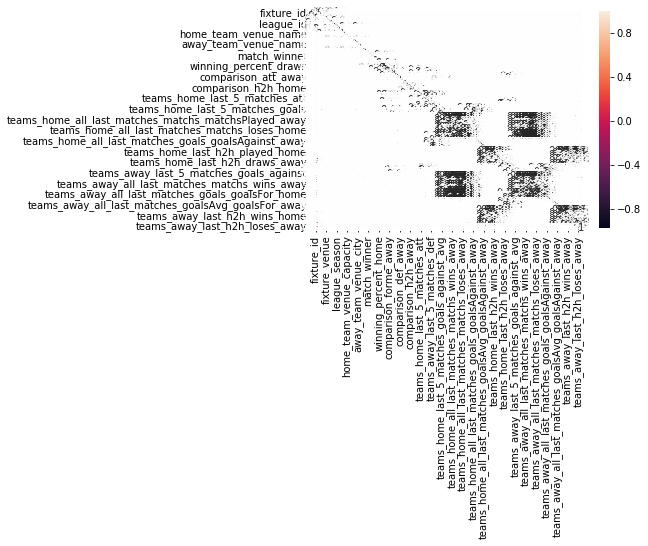

In [15]:
corrMatrix = soccer.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
soccer_x_train=soccer.iloc[:,0:101]
soccer_y_train=soccer.iloc[:,-1]

In [17]:
soccer_x_train

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_home,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away
0,153809,407,400,84,539,515,409,39,2019,1730,...,0.8,1.0,18,18,10,6,6,5,2,7
1,363929,7412,7410,156,25,1614,32,130,2019,683,...,1.8,2.0,2,2,2,1,0,0,0,1
2,317056,2312,2302,40,1994,587,64,86,2019,166,...,0.0,1.0,3,4,3,1,0,1,0,2
3,487467,12711,6638,118,5075,2246,6,123,2019,700,...,1.9,1.8,2,1,0,0,1,1,1,0
4,368836,563,209,46,7778,514,453,141,2019,1678,...,0.0,1.0,1,1,1,1,0,0,0,0
5,153790,406,402,63,799,515,409,39,2019,1788,...,0.5,1.3,15,15,7,5,3,5,5,5
6,294835,9486,9481,98,677,1256,385,68,2019,1787,...,0.3,1.7,0,1,0,0,0,0,0,1
7,234099,473,469,119,1652,899,332,4,2019,1730,...,0.6,1.2,0,3,0,1,0,1,0,1
8,270461,8550,1407,118,6100,1141,443,23,2019,1875,...,0.7,1.7,1,2,1,1,0,1,0,0
9,296379,9565,9562,112,5998,1261,390,68,2019,1728,...,0.8,1.3,0,1,0,0,0,0,0,1


# Testing Set

In [18]:
soccer_test=pd.read_csv(r"F:\r studio\python\ML Project soccer score prediction\testing_data.csv",sep=";")

In [19]:
soccer_test.head()

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_home,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away
0,76573,378,363,2019/09/01,Östgötaporten,291,Allsvenskan,Sweden,2019,Regular Season - 22,...,1.0,1.6,4,5,1,1,2,1,1,3
1,153893,400,404,2020/03/08,Telia Parken,515,Superligaen,Denmark,2019,Regular Season - 24,...,1.8,1.9,9,7,2,2,2,1,5,4
2,167755,3729,3731,2019/09/29,eFotbal aréna,580,FNL,Czech-Republic,2019,Regular Season - 10,...,1.2,1.5,2,2,1,1,0,1,1,0
3,254949,4521,4420,2019/09/29,Stade Félix Houphouët-Boigny,1034,CAF Confederation Cup,World,2019,1st Round,...,1.5,1.0,1,1,0,0,1,0,0,1
4,306820,4727,6355,2019/11/17,Estádio Municipal Engenheiro Sílvio Henriques ...,1289,Campeonato de Portugal Prio - Group C,Portugal,2019,Group C - 11,...,1.4,2.0,0,1,0,0,0,1,0,0


In [20]:
soccer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 101 entries, fixture_id to teams_away_last_h2h_loses_away
dtypes: float64(19), int64(70), object(12)
memory usage: 394.6+ KB


In [21]:
soccer_test.describe()

,fixture_id,teams_home_team_id,teams_away_team_id,league_id,league_season,home_team_venue_capacity,home_team_founded,away_team_venue_capacity,away_team_founded,under_over,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_home,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away
count,500.000000,500.00000,500.000000,500.000000,500.00000,435.000000,366.000000,438.000000,359.000000,164.000000,...,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,289466.064000,4819.36400,4733.766000,1130.240000,2019.17200,11828.374713,1947.448087,13187.372146,1944.072423,-1.512195,...,1.162000,1.37500,2.490000,2.824000,1.196000,0.864000,0.634000,0.704000,0.660000,1.256000
std,121196.979465,3675.41056,3665.217051,567.776857,0.42753,14429.489986,39.707993,16420.776074,39.436963,2.491674,...,0.786685,1.02993,2.681096,2.552264,1.634297,1.191782,0.966391,1.048132,1.078297,1.500322
min,75968.000000,10.00000,37.000000,284.000000,2019.00000,500.000000,1863.000000,500.000000,1846.000000,-3.500000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214813.500000,1518.25000,1419.000000,769.000000,2019.00000,2500.000000,1913.000000,2500.000000,1912.000000,-3.500000,...,0.700000,0.80000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273615.500000,3994.50000,4006.000000,1121.500000,2019.00000,6000.000000,1945.500000,6000.000000,1936.000000,-3.500000,...,1.100000,1.30000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,317013.000000,7804.50000,7728.750000,1291.250000,2019.00000,15365.500000,1983.750000,17510.000000,1976.000000,1.500000,...,1.500000,2.00000,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,621423.000000,14065.00000,15143.000000,2923.000000,2022.00000,99787.000000,2018.000000,100000.000000,2018.000000,3.500000,...,4.800000,7.00000,14.000000,13.000000,11.000000,8.000000,6.000000,6.000000,9.000000,9.000000


In [22]:
soccer_test.shape

(500, 101)

In [23]:
soccer_test.isnull().sum()

fixture_id                                                  0
teams_home_team_id                                          0
teams_away_team_id                                          0
fixture_date                                                0
fixture_venue                                               0
league_id                                                   0
league_name                                                 0
league_country                                              0
league_season                                               0
league_round                                                0
home_team_venue_name                                       65
home_team_venue_city                                       65
home_team_venue_capacity                                   65
home_team_country                                           0
home_team_founded                                         134
away_team_venue_name                                       62
away_tea

In [24]:
soccer_test['home_team_venue_name']=soccer_test['home_team_venue_name'].fillna('Gradski Stadion')
soccer_test['home_team_venue_city']=soccer_test['home_team_venue_city'].fillna('London')
soccer_test['home_team_venue_capacity']=soccer_test['home_team_venue_capacity'].fillna(soccer_test['home_team_venue_capacity'].median())
soccer_test['home_team_country']=soccer_test['home_team_country'].fillna('Spain')
soccer_test['home_team_founded']=soccer_test['home_team_founded'].fillna(soccer_test['home_team_founded'].median())
soccer_test['away_team_venue_name']=soccer_test['away_team_venue_name'].fillna('Gradski Stadion')
soccer_test['away_team_venue_city']=soccer_test['away_team_venue_city'].fillna('London')
soccer_test['away_team_venue_capacity']=soccer_test['away_team_venue_capacity'].fillna(soccer_test['away_team_venue_capacity'].median())
soccer_test['away_team_country']=soccer_test['away_team_country'].fillna('Spain')
soccer_test['away_team_founded']=soccer_test['away_team_founded'].fillna(soccer_test['away_team_founded'].median())
soccer_test['under_over']=soccer_test['under_over'].fillna(soccer_test['under_over'].median())
soccer_test['goals_home']=soccer_test['goals_home'].fillna(soccer_test['goals_home'].median())
soccer_test['goals_away']=soccer_test['goals_away'].fillna(soccer_test['goals_away'].median())

In [25]:
soccer_test[soccer_test.select_dtypes(include=['object']).columns]=soccer_test[soccer_test.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [26]:
soccer_test_x=soccer_test.iloc[:,0:101]

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
dt=RandomForestClassifier(n_estimators=1000,oob_score=True,class_weight='balanced')

In [29]:
dt

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       oob_score=True)

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada=AdaBoostClassifier(base_estimator=dt,n_estimators=1000,learning_rate=1)

In [32]:
ada

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         n_estimators=1000,
                                                         oob_score=True),
                   learning_rate=1, n_estimators=1000)

In [33]:
ada.fit(soccer_x_train,soccer_y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         n_estimators=1000,
                                                         oob_score=True),
                   learning_rate=1, n_estimators=1000)

In [34]:
pred_value=ada.predict(soccer_test_x)

In [35]:
pred_value

array([1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2,

# Validation Set

In [36]:
soccer_validation=pd.read_csv(r"F:\r studio\python\ML Project soccer score prediction\validation_data.csv",sep=";")

In [37]:
soccer_validation.head()

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
0,167315,4256,1404,2019-11-22,Merkur Arena,577,Erste Liga,Austria,2019,Regular Season - 15,...,1.7,1,1,0,0,1,1,0,0,0
1,302205,9740,9742,2019-10-13,Estadio Municipal Los Manantiales,1277,Tercera Division - Group 9,Spain,2019,Group 9 - 8,...,1.7,1,1,1,1,0,0,0,0,2
2,277070,7645,7625,2019-10-05,The Powerday Stadium (London),1171,Non League Div One - Isthmian South,England,2019,Isthmian South Central - 8,...,1.0,1,1,0,0,0,0,1,1,1
3,335715,2516,2514,2019-09-22,Mini Manjung Stadium,1440,Malaysia Cup,Malaysia,2019,Group Stage - 6,...,2.0,3,3,2,1,0,0,1,2,1
4,210851,1302,104,2020-02-14,Stade Armand Chouffet (Villefranche-sur-Saône),762,National,France,2019,Regular Season - 22,...,1.1,1,1,0,0,0,1,1,0,0


In [38]:
soccer_validation.describe()

,fixture_id,teams_home_team_id,teams_away_team_id,league_id,league_season,home_team_venue_capacity,home_team_founded,away_team_venue_capacity,away_team_founded,under_over,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
count,7900.000000,7900.000000,7900.000000,7900.00000,7900.000000,6718.000000,5756.000000,6757.000000,5690.000000,2400.000000,...,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000,7900.000000
mean,292427.386329,4848.328987,4844.563671,1126.08519,2019.167342,12387.108068,1945.709521,12615.162054,1945.962214,-1.148333,...,1.373430,2.651266,2.996076,1.188861,0.931013,0.669494,0.740506,0.792911,1.324557,1.091139
std,125586.695531,3699.866249,3706.224074,572.93967,0.390217,14943.012041,53.018804,15405.970247,46.732140,2.611035,...,0.996623,3.112611,3.023202,1.698812,1.383415,1.084367,1.082613,1.315676,1.705937,0.740760
min,75735.000000,4.000000,3.000000,126.00000,2018.000000,150.000000,13.000000,150.000000,13.000000,-3.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214732.750000,1483.750000,1461.000000,760.00000,2019.000000,2610.250000,1915.000000,2500.000000,1914.000000,-3.500000,...,0.800000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271899.500000,4005.500000,4004.500000,1090.00000,2019.000000,6011.500000,1942.000000,6000.000000,1943.000000,-3.500000,...,1.300000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,323224.000000,7814.000000,7856.000000,1300.25000,2019.000000,15853.000000,1976.000000,16095.000000,1977.000000,1.500000,...,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,625404.000000,15140.000000,15152.000000,2940.00000,2022.000000,120000.000000,2020.000000,120000.000000,2020.000000,5.500000,...,15.000000,28.000000,27.000000,16.000000,17.000000,13.000000,13.000000,16.000000,16.000000,2.000000


In [39]:
soccer_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Columns: 102 entries, fixture_id to outcome
dtypes: float64(19), int64(71), object(12)
memory usage: 6.1+ MB


In [40]:
soccer_validation.isnull().sum()

fixture_id                                                   0
teams_home_team_id                                           0
teams_away_team_id                                           0
fixture_date                                                 0
fixture_venue                                                0
league_id                                                    0
league_name                                                  0
league_country                                               0
league_season                                                0
league_round                                                 0
home_team_venue_name                                      1183
home_team_venue_city                                      1193
home_team_venue_capacity                                  1182
home_team_country                                            9
home_team_founded                                         2144
away_team_venue_name                                   

In [41]:
soccer_validation['home_team_venue_name']=soccer_validation['home_team_venue_name'].fillna('Gradski Stadion')
soccer_validation['home_team_venue_city']=soccer_validation['home_team_venue_city'].fillna('London')
soccer_validation['home_team_venue_capacity']=soccer_validation['home_team_venue_capacity'].fillna(soccer_validation['home_team_venue_capacity'].median())
soccer_validation['home_team_country']=soccer_validation['home_team_country'].fillna('Spain')
soccer_validation['home_team_founded']=soccer_validation['home_team_founded'].fillna(soccer_validation['home_team_founded'].median())
soccer_validation['away_team_venue_name']=soccer_validation['away_team_venue_name'].fillna('Gradski Stadion')
soccer_validation['away_team_venue_city']=soccer_validation['away_team_venue_city'].fillna('London')
soccer_validation['away_team_venue_capacity']=soccer_validation['away_team_venue_capacity'].fillna(soccer_validation['away_team_venue_capacity'].median())
soccer_validation['away_team_country']=soccer_validation['away_team_country'].fillna('Spain')
soccer_validation['away_team_founded']=soccer_validation['away_team_founded'].fillna(soccer_validation['away_team_founded'].median())
soccer_validation['under_over']=soccer_validation['under_over'].fillna(soccer_validation['under_over'].median())
soccer_validation['goals_home']=soccer_validation['goals_home'].fillna(soccer_validation['goals_home'].median())
soccer_validation['goals_away']=soccer_validation['goals_away'].fillna(soccer_validation['goals_away'].median())

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
soccer_validation[soccer_validation.select_dtypes(include=['object']).columns]=soccer_validation[soccer_validation.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [44]:
soccer_validation.head()

,fixture_id,teams_home_team_id,teams_away_team_id,fixture_date,fixture_venue,league_id,league_name,league_country,league_season,league_round,...,teams_away_all_last_matches_goalsAvg_goalsAgainst_away,teams_away_last_h2h_played_home,teams_away_last_h2h_played_away,teams_away_last_h2h_wins_home,teams_away_last_h2h_wins_away,teams_away_last_h2h_draws_home,teams_away_last_h2h_draws_away,teams_away_last_h2h_loses_home,teams_away_last_h2h_loses_away,outcome
0,167315,4256,1404,131,2255,577,154,8,2019,1170,...,1.7,1,1,0,0,1,1,0,0,0
1,302205,9740,9742,91,1115,1277,420,117,2019,596,...,1.7,1,1,1,1,0,0,0,0,2
2,277070,7645,7625,83,4292,1171,281,43,2019,800,...,1.0,1,1,0,0,0,0,1,1,1
3,335715,2516,2514,70,2283,1440,240,81,2019,739,...,2.0,3,3,2,1,0,0,1,2,1
4,210851,1302,104,155,3014,762,255,49,2019,1178,...,1.1,1,1,0,0,0,1,1,0,0


In [45]:
soccer_validation_x=soccer_validation.iloc[:,0:101]
soccer_validation_y=soccer_validation.iloc[:,-1]

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.feature_selection import RFE

In [48]:
rf=RandomForestClassifier()

In [49]:
rfe_rfc=RFE(rf,90)

C:\Users\HP SMART\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=90 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [50]:
rfe_rfc.fit(soccer_validation_x,soccer_validation_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=90)

In [51]:
rfe_rfc.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [52]:
rfe_rfc.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 12,  9,  8,  1, 11,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  5,  7,  1,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
soccer_validation_x_train,soccer_validation_x_test,soccer_validation_y_train,soccer_validation_y_test=train_test_split(soccer_validation_x,soccer_validation_y,test_size=.2,random_state=555)

In [55]:
pred_dt=rfe_rfc.predict(soccer_validation_x_test)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
tab2=confusion_matrix(pred_dt,soccer_validation_y_test)

In [58]:
tab2

array([[360,   0,   0],
       [  0, 731,   0],
       [  0,   0, 489]], dtype=int64)

In [59]:
tab2.diagonal().sum()*100/tab2.sum()

100.0

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [61]:
print(classification_report(pred_dt,soccer_validation_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       489

    accuracy                           1.00      1580
   macro avg       1.00      1.00      1.00      1580
weighted avg       1.00      1.00      1.00      1580



In [62]:
print(f1_score(soccer_validation_y_test, pred_dt, average="weighted"))

1.0


In [63]:
print(precision_score(soccer_validation_y_test, pred_dt, average="macro"))

1.0


In [64]:
print(recall_score(soccer_validation_y_test, pred_dt, average="macro"))  

1.0
